In [1]:
import numpy as np
import time
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from perceptronutils import *


In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
sns.set_style('whitegrid')
sns.set_context('paper',font_scale=2)
%matplotlib inline

## Why not use the 0-1 loss function

Below is the implementation of the `0-1` loss function.

$$
J({\bf w}) = \sum_{i=1}^N \mathbb{1}[y_i({\bf w}^\top{\bf x}_i) < 0]
$$

```python
def zerooneobjfunc(w,X,y):
    return np.sum(y*np.dot(X,w) < 0)
```

We will consider a 2-D data set. The decision boundary (or the line) will be represented using three parameters ($w_0, w_1, w_2$). We will evaluate the objective function for different combinations of the three parameters and then plot the objective function as a function of only the last two parameters (*Since we cannot plot a 4D plot*) 

In [3]:
def zerooneobjfunc(w,X,y):
    return np.sum(y*np.dot(X,w) < 0)

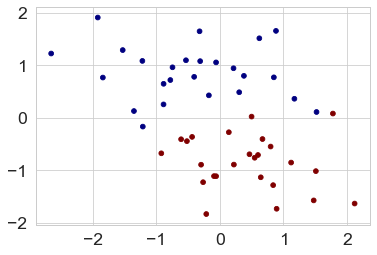

In [4]:
# consider a simple 2-D data set
# prepare data
# make_blobs is a function provided by sklearn to generate synthetic data
X, y = make_blobs(n_samples=50, centers=2, n_features=2, random_state=0)
X = StandardScaler().fit_transform(X)
X_i = np.hstack([np.ones((X.shape[0],1)),X])
y[y == 0] = -1
y = y[:,np.newaxis]
plt.scatter(X[:,0],X[:,1],c=y.flatten(),cmap='jet')

In [5]:
w1s = w2s = np.linspace(-25,25,50)
W1,W2 = np.meshgrid(w1s,w2s)

In [12]:
losses = []
w0 = 10
for w1,w2 in zip(W1.flatten(),W2.flatten()):
    w = np.array([[w0],[w1],[w2]])
    #losses.append(computeLoss(X,y,w))
    losses.append(zerooneobjfunc(w,X_i,y))

In [13]:
losses = np.array(losses)
J = np.reshape(losses,W1.shape)

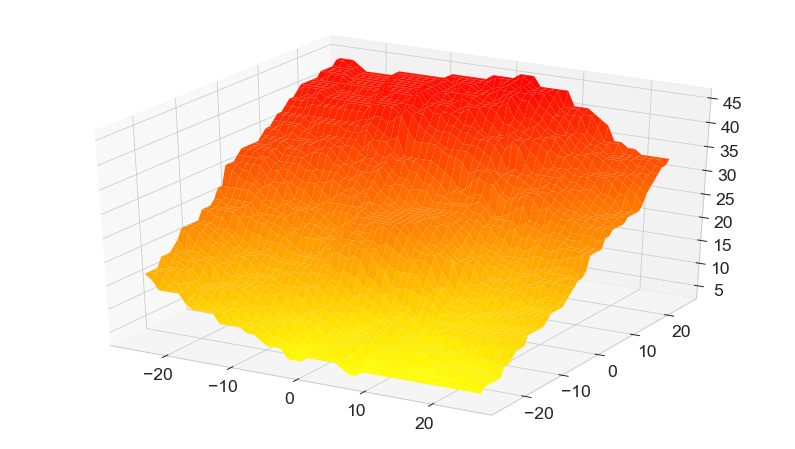

In [14]:
fig = plt.figure(figsize=(14,8))

ax = fig.add_subplot(projection='3d')
ax.plot_surface(W1, W2, J, rstride=1, cstride=1,
                cmap='autumn_r', edgecolor='none')


## Perceptron Demo


In [15]:
def plotBoundary(X,y,w,ax):
    h = .02  # step size in the mesh

    X1_min, X1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    X2_min, X2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    X1_, X2_ = np.meshgrid(np.arange(X1_min, X1_max, h),np.arange(X2_min, X2_max, h))
    Xpred = np.c_[np.ones(len(X1_.ravel())),X1_.ravel(), X2_.ravel()]
    ypred = np.dot(Xpred,w)
    ypred_ = np.zeros(ypred.shape)
    ypred_[ypred >= 0] = 1
    ypred_[ypred < 0] = -1
    ypred = ypred_.reshape(X1_.shape)
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax.pcolormesh(X1_, X2_, ypred, cmap=cm_bright,alpha=.1)
    sp = ax.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=cm_bright)
    
    ax.set_xlim(X1_.min(), X1_.max())
    ax.set_ylim(X2_.min(), X2_.max())
    ax.set_xticks(())
    ax.set_yticks(())

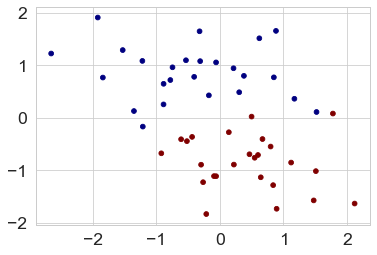

In [16]:
# prepare data
# make_blobs is a function provided by sklearn to generate synthetic data
X, y = make_blobs(n_samples=50, centers=2, n_features=2, random_state=0)
X = StandardScaler().fit_transform(X)
y[y == 0] = -1
y = y[:,np.newaxis]
plt.scatter(X[:,0],X[:,1],c=y.flatten(),cmap='jet')

In [17]:
eta = 0.01
# initialize w
winit = np.array([1,1,1])
winit = winit[:,np.newaxis]
w = winit
losses = []
mistakes = []
numiters = 10

After iteration 0
[98.80265086283184]
[28]
[[50.        ]
 [ 5.73649334]
 [70.60046935]]
[[1]
 [1]
 [1]]
After iteration 1
[98.80265086283184, 41.51279024786465]
[28, 22]
[[25.        ]
 [18.72912796]
 [36.58897738]]
[[0.5       ]
 [0.94263507]
 [0.29399531]]
After iteration 2
[98.80265086283184, 41.51279024786465, 22.614261128785742]
[28, 22, 14]
[[12.5       ]
 [17.58452954]
 [22.50211618]]
[[ 0.25      ]
 [ 0.75534379]
 [-0.07189447]]
After iteration 3
[98.80265086283184, 41.51279024786465, 22.614261128785742, 14.43673643859434]
[28, 22, 14, 11]
[[ 6.25      ]
 [13.84752002]
 [15.20154366]]
[[ 0.125     ]
 [ 0.57949849]
 [-0.29691563]]
After iteration 4
[98.80265086283184, 41.51279024786465, 22.614261128785742, 14.43673643859434, 10.49955113156481]
[28, 22, 14, 11, 5]
[[ 3.125     ]
 [10.33889141]
 [10.7117125 ]]
[[ 0.0625    ]
 [ 0.44102329]
 [-0.44893107]]
After iteration 5
[98.80265086283184, 41.51279024786465, 22.614261128785742, 14.43673643859434, 10.49955113156481, 8.515256714

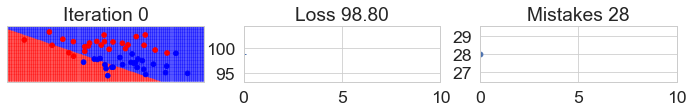

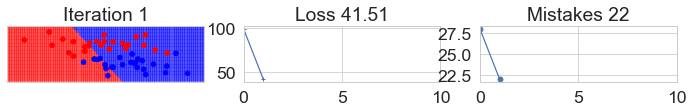

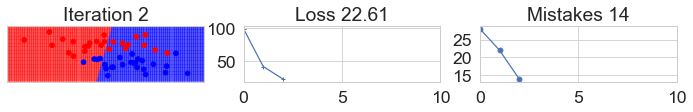

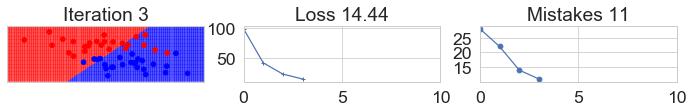

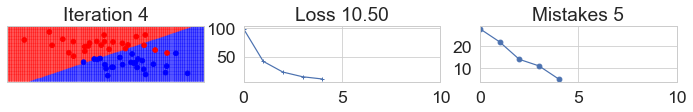

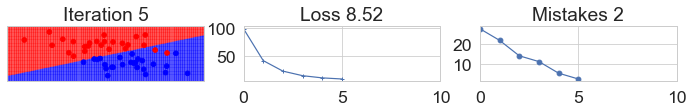

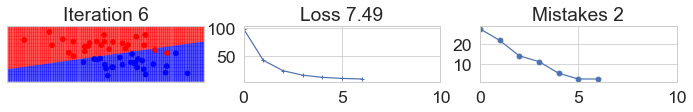

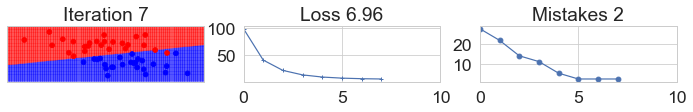

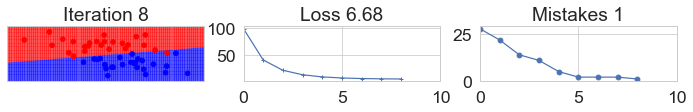

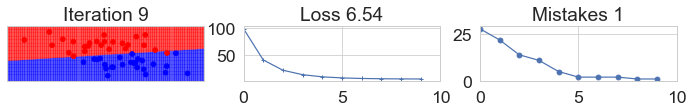

In [18]:
for iter in range(numiters):
    print("After iteration %d"%iter)
    # compute loss
    losses.append(computeLoss(X,y,w))
    # compute number of mistakes
    mistakes.append(computeMistakes(X,y,w))
    # compute gradient
    grad = computeGradient(X,y,w)
    print(losses)
    print(mistakes)
    print(grad)
    print(w)
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(numiters,3,3*iter+1)
    # plot current boundary
    plotBoundary(X,y,w,ax)
    ax.set_title('Iteration %d'%iter)
    # plot losses
    ax = fig.add_subplot(numiters,3,3*iter+2)
    ax.plot(range(len(losses)),losses,'-+')
    ax.set_xlim([0,numiters])
    ax.set_title('Loss %.2f'%losses[iter])
    # plot mistakes
    ax = fig.add_subplot(numiters,3,3*iter+3)
    ax.plot(range(len(mistakes)),mistakes,'-o')
    ax.set_xlim([0,numiters])
    ax.set_title('Mistakes %d'%mistakes[iter])
    # update weight
    w = w - eta*grad


# Loss Functions

Here we study the different types of loss functions and how they are different from each other. In particular, the `0-1` loss function is the one that we aspire to be. However, as shown later, the objective function that uses the `0-1` loss function is *hard* to optimize over. 

In [ ]:
def zerooneloss(f,y):
    if f*y > 0:
        return 0
    else:
        return 1
    
def squaredloss(f,y):
    return np.power(f-y,2)

def logisticloss(f,y):
    #return np.log(1+np.exp(-f*y))
    return np.exp(-f*y)

def hingedloss(f,y):
    return max(0,1-f*y)

In [ ]:
wtx = np.linspace(-1,2,100)
loss = []
for f in wtx:
    loss.append(zerooneloss(f,1))
plt.plot(wtx,loss)
loss = []
for f in wtx:
    loss.append(squaredloss(f,1))
plt.plot(wtx,loss)
loss = []
for f in wtx:
    loss.append(logisticloss(f,1))
plt.plot(wtx,loss)
loss = []
for f in wtx:
    loss.append(hingedloss(f,1))
plt.plot(wtx,loss)
#plt.legend(['1','2','3','4'])
plt.legend(['0-1','squared','logistic','hinged'])